0 o- 0.0001
1 D- 0.001
2 x- 0.01
3 >- 0.1
0 o- 0.0001
1 D- 0.001
2 x- 0.01
3 >- 0.1
0 o- 0.0001
1 D- 0.001
2 x- 0.01
3 >- 0.1


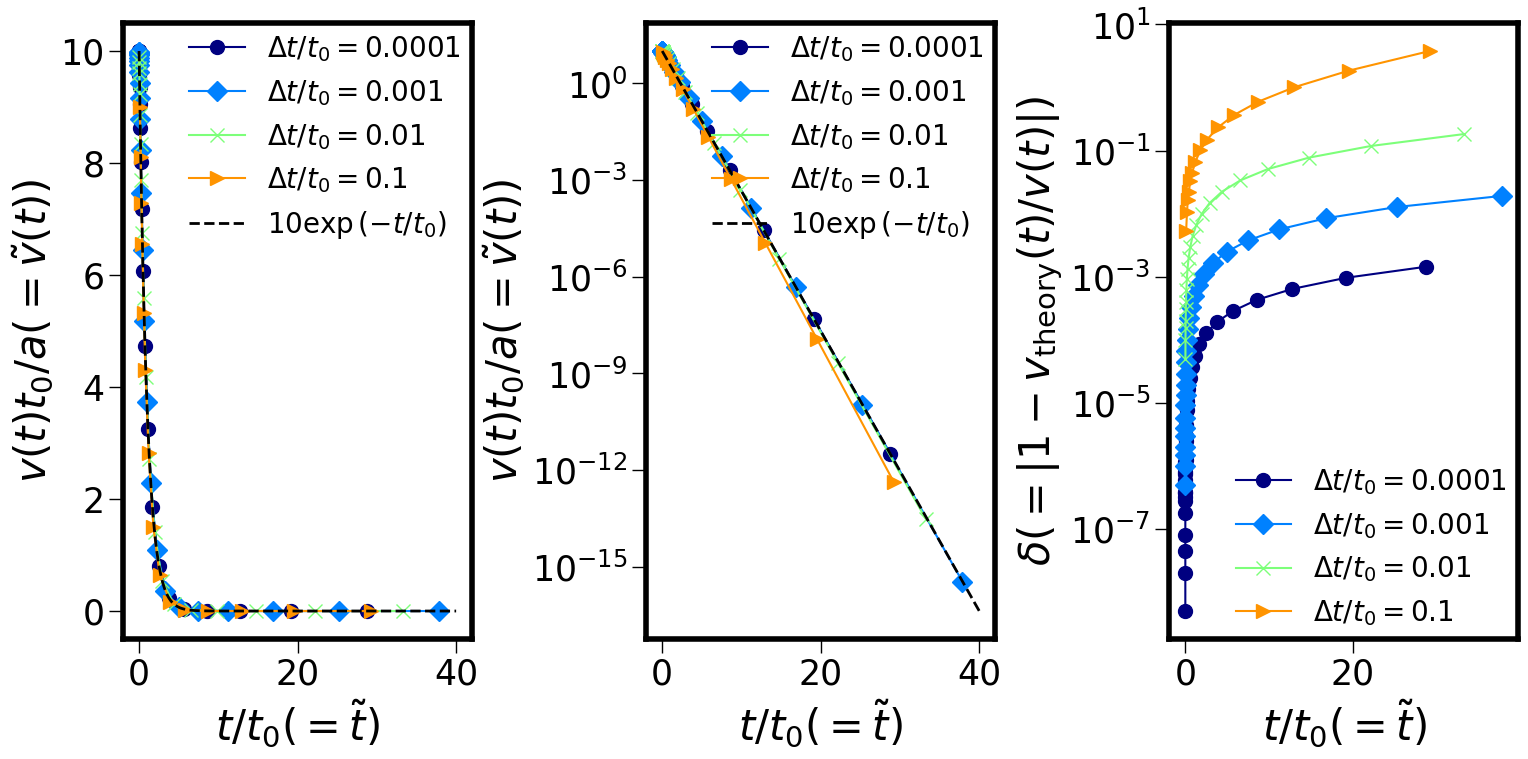

In [1]:
import matplotlib
import matplotlib.pyplot as plt
#%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
import matplotlib.cm as cm  # colormap
import numpy as np
#plt.rcParams["text.usetex"] =True
plt.rcParams['font.family'] = 'sans-serif'
#plt.rcParams['font.family'] = 'Arial' #使用するフォント名
plt.rcParams["font.size"] = 25

fig = plt.figure(figsize=(18,8))

dt=[0.0001,0.0010,0.0100,0.1000]
symbol =['o-','D-','x-','>-']

for j in range (1,4): #jは1,2,3
    #ax = fig.add_subplot("13{}".format(j))
    ax = fig.add_subplot(1,3,j) #複数プロット、縦1横3、j番目
    if(j>1):
        plt.yscale('log')

    for i in range (0,4): #iが0,1,2,3
        print(i,symbol[i],dt[i])  # for check on the arrays
        time,vel= np.loadtxt("/home/ssaito/simulation/2023-simulation-training/Lecture3/velo_{:.4f}.dat".format(dt[i]), comments='#', unpack=True)
        if(j!=3):
            plt.plot(time,vel, "{}".format(symbol[i]) ,markersize=10,color=cm.jet(i/4.),label=r"$\Delta t/t_0={}$".format(dt[i]))
        #color=cm.jet:色を青から赤に順番に変わっていく
        else:
            plt.plot(time,np.abs(1 -10.*np.exp(-time)/vel), "{}".format(symbol[i]) ,markersize=10,color=cm.jet(i/4.),label=r"$\Delta t/t_0={}$".format(dt[i]))


    ###Drawing a line ######
    if(j<3):
        time= np.linspace(1e-4, 4e1, 1000)
        vel= 10.*np.exp(-time)
        plt.plot(time,vel, "--",markersize=3,linewidth = 2.0, color="k",label=r"$10\exp{(-t/t_0)}$")
    #########
    #図の書式設定
    plt.tick_params(which='major',width = 1, length = 10)
    plt.tick_params(which='minor',width = 1, length = 5)
    ax.spines['top'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['left'].set_linewidth(4)
    ax.spines['right'].set_linewidth(4)
    plt.xlabel(r"$t/t_0(=\tilde{t})$",color='k', size=30)
    if(j!=3):
        plt.ylabel(r"$v(t)t_0/a(=\tilde{v}(t))$",color='k', size=30)
    else:
        plt.ylabel(r"$\delta(=|1-v_{\rm theory}(t)/v(t)|)$",color='k', size=30)

    #図の凡例の有無や位置，サイズを調整
    if(j<3):
        plt.legend(ncol=1, loc=1, borderaxespad=0, fontsize=20,frameon=False)
    else:
        plt.legend(ncol=1, loc=4, borderaxespad=0, fontsize=20,frameon=False)

#################################
#図のマージン設定
plt.subplots_adjust(wspace=0.5, hspace=0.25)
#各自ファイルのパスを変えること．
plt.savefig('/home/ssaito/simulation/2023-simulation-training/Lecture3/velo_dt_lin_log.png')
plt.savefig('/home/ssaito/simulation/2023-simulation-training/Lecture3/velo_dt_lin_log.pdf')
plt.show()